In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
def evaluation_classif_L(conf_mat):
    TP = conf_mat[0,0]
    FP = conf_mat[1,0]+conf_mat[2,0]+conf_mat[3,0]+conf_mat[4,0]
    FN = conf_mat[0,1]+conf_mat[0,2]+conf_mat[0,3]+conf_mat[0,4]
    TN = conf_mat[1,1]+conf_mat[1,2]+conf_mat[1,3]+conf_mat[1,4]+conf_mat[2,1]+conf_mat[2,2]+conf_mat[2,3]+conf_mat[2,4]+conf_mat[3,1]+conf_mat[3,2]+conf_mat[3,3]+conf_mat[3,4]+conf_mat[4,1]+conf_mat[4,2]+conf_mat[4,3]+conf_mat[4,4]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    

    return accuracy, precision, sensitivity, specificity

In [3]:
def evaluation_classif_N(conf_mat):
    TP = conf_mat[1,1]
    FP = conf_mat[0,1]+conf_mat[2,1]+conf_mat[3,1]+conf_mat[4,1]
    FN = conf_mat[1,0]+conf_mat[1,2]+conf_mat[1,3]+conf_mat[1,4]
    TN = conf_mat[0,0]+conf_mat[0,2]+conf_mat[0,3]+conf_mat[0,4]+conf_mat[2,0]+conf_mat[2,2]+conf_mat[2,3]+conf_mat[2,4]+conf_mat[3,0]+conf_mat[3,2]+conf_mat[3,3]+conf_mat[3,4]+conf_mat[4,0]+conf_mat[4,2]+conf_mat[4,3]+conf_mat[4,4]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    

    return accuracy, precision, sensitivity, specificity

In [4]:
def evaluation_classif_R(conf_mat):
    TP = conf_mat[2,2]
    FP = conf_mat[0,2]+conf_mat[1,2]+conf_mat[3,2]+conf_mat[4,2]
    FN = conf_mat[2,0]+conf_mat[2,1]+conf_mat[2,3]+conf_mat[2,4]
    TN = conf_mat[0,0]+conf_mat[0,1]+conf_mat[0,3]+conf_mat[0,4]+conf_mat[1,0]+conf_mat[1,1]+conf_mat[1,3]+conf_mat[1,4]+conf_mat[3,0]+conf_mat[3,1]+conf_mat[3,3]+conf_mat[3,4]+conf_mat[4,0]+conf_mat[4,1]+conf_mat[4,3]+conf_mat[4,4]
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    

    return accuracy, precision, sensitivity, specificity

In [5]:
def evaluation_classif_S(conf_mat):
    TP = conf_mat[3,3]
    FP = conf_mat[0,3]+conf_mat[1,3]+conf_mat[2,3]+conf_mat[4,3]
    FN = conf_mat[3,0]+conf_mat[3,1]+conf_mat[3,2]+conf_mat[3,4]
    TN = conf_mat[0,0]+conf_mat[0,1]+conf_mat[0,2]+conf_mat[0,4]+conf_mat[1,0]+conf_mat[1,1]+conf_mat[1,2]+conf_mat[1,4]+conf_mat[2,0]+conf_mat[2,1]+conf_mat[2,2]+conf_mat[2,4]+conf_mat[4,0]+conf_mat[4,1]+conf_mat[4,2]+conf_mat[4,4]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    

    return accuracy, precision, sensitivity, specificity

In [6]:
def evaluation_classif_T(conf_mat):
    TP = conf_mat[4,4]
    FP = conf_mat[0,4]+conf_mat[1,4]+conf_mat[2,4]+conf_mat[3,4]
    FN = conf_mat[4,0]+conf_mat[4,1]+conf_mat[4,2]+conf_mat[4,3]
    TN = conf_mat[0,0]+conf_mat[0,1]+conf_mat[0,2]+conf_mat[0,3]+conf_mat[1,0]+conf_mat[1,1]+conf_mat[1,2]+conf_mat[1,3]+conf_mat[2,0]+conf_mat[2,1]+conf_mat[2,2]+conf_mat[2,3]+conf_mat[3,0]+conf_mat[3,1]+conf_mat[3,2]+conf_mat[3,3]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    precision = TP/(TP+FP)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    

    return accuracy, precision, sensitivity, specificity

In [7]:
from google.colab import drive
drive.mount('/content/drive')
dataset_obuka_poc = pd.read_csv('drive/My Drive/diplomski2021/svi_preimenovani.csv')
#dataset_test = pd.read_csv('cookies_test.csv', header=0)
print(dataset_obuka_poc.shape)

dataset_obuka_poc.head()

Mounted at /content/drive
(9015, 386)


,name,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,...,pcm_fftMag_mfcc_sma_de[12]_stddev,pcm_fftMag_mfcc_sma_de[12]_skewness,pcm_fftMag_mfcc_sma_de[12]_kurtosis,pcm_zcr_sma_de_max,pcm_zcr_sma_de_min,pcm_zcr_sma_de_range,pcm_zcr_sma_de_maxPos,pcm_zcr_sma_de_minPos,pcm_zcr_sma_de_amean,pcm_zcr_sma_de_linregc1,pcm_zcr_sma_de_linregc2,pcm_zcr_sma_de_linregerrQ,pcm_zcr_sma_de_stddev,pcm_zcr_sma_de_skewness,pcm_zcr_sma_de_kurtosis,voiceProb_sma_de_max,voiceProb_sma_de_min,voiceProb_sma_de_range,voiceProb_sma_de_maxPos,voiceProb_sma_de_minPos,voiceProb_sma_de_amean,voiceProb_sma_de_linregc1,voiceProb_sma_de_linregc2,voiceProb_sma_de_linregerrQ,voiceProb_sma_de_stddev,voiceProb_sma_de_skewness,voiceProb_sma_de_kurtosis,F0_sma_de_max,F0_sma_de_min,F0_sma_de_range,F0_sma_de_maxPos,F0_sma_de_minPos,F0_sma_de_amean,F0_sma_de_linregc1,F0_sma_de_linregc2,F0_sma_de_linregerrQ,F0_sma_de_stddev,F0_sma_de_skewness,F0_sma_de_kurtosis,class
0,'1BMZD01L__1100.wav',0.126734,0.000055,0.126679,112.0,0.0,0.016041,-0.000043,0.024348,0.000462,0.022029,2.142594,8.407606,-1.844059,-27.03705,25.19299,177.0,103.0,-14.56909,0.013259,-17.10163,27.15517,5.413343,0.119873,1.794335,8.720191,-31.03524,39.75543,321.0,213.0,-10.097830,0.005387,-11.126710,85.85950,9.285161,-0.372264,1.957626,17.69998,-18.78628,36.48627,...,1.691897,0.313223,3.179798,0.102783,-0.078766,0.181549,275.0,105.0,-0.000278,0.000035,-0.006937,0.000585,0.024494,0.283882,5.647820,0.166179,-0.176359,0.342538,127.0,90.0,-0.000096,-0.000028,0.005342,0.002450,0.049601,0.336651,4.519399,114.9648,-101.3333,216.2981,127.0,122.0,-1.250842e-08,-0.014148,2.702250,1078.179,32.87287,0.426760,5.684139,?
1,'1BMZD02L__1100.wav',0.104423,0.000002,0.104421,353.0,0.0,0.011477,-0.000011,0.014350,0.000352,0.018844,2.225843,8.098756,0.974885,-34.26795,35.24283,398.0,340.0,-16.39657,0.005342,-17.76143,43.62640,6.652050,0.100413,3.095456,14.731230,-32.77382,47.50505,371.0,328.0,-4.341946,0.000549,-4.482156,88.41502,9.403276,-1.113316,3.485484,12.30213,-24.61183,36.91396,...,1.332714,-0.594988,5.239968,0.156140,-0.155959,0.312099,161.0,174.0,-0.000310,0.000029,-0.007703,0.001531,0.039367,-0.341028,7.362464,0.172052,-0.152270,0.324322,175.0,159.0,0.000420,-0.000011,0.003298,0.001690,0.041148,0.133848,5.711322,127.7681,-127.7681,255.5363,82.0,90.0,-1.993612e-08,-0.004275,1.092231,1147.936,33.88709,0.112976,6.739047,?
2,'1BMZD03L__1100.wav',0.115782,0.000015,0.115767,246.0,0.0,0.008997,-0.000004,0.010173,0.000225,0.015031,3.572816,19.761600,-0.425950,-32.38249,31.95654,269.0,380.0,-16.17110,-0.001923,-15.65093,41.04144,6.413421,0.123972,3.016148,11.259930,-30.11838,41.37830,148.0,247.0,-5.245133,0.002450,-5.907737,73.14439,8.561032,-0.758224,2.837269,16.71596,-19.17394,35.88990,...,1.626166,0.036177,3.807801,0.154870,-0.173019,0.327889,146.0,154.0,-0.000534,0.000021,-0.006182,0.001504,0.038917,-0.216208,8.216058,0.190705,-0.160796,0.351501,130.0,217.0,0.000019,-0.000009,

In [8]:
dataset_obuka_poc.loc[0:1752, 'class'] = 'L'
dataset_obuka_poc.loc[1753:3588, 'class'] = 'N'
dataset_obuka_poc.loc[3589:5341, 'class'] = 'R'
dataset_obuka_poc.loc[5342:7177, 'class'] = 'T'
dataset_obuka_poc.loc[7178:9016, 'class'] = 'S'

In [ ]:
print(dataset_obuka_poc.loc[5342:7178])

                           name  ...  class
5342       '4BMZD01T__1100.wav'  ...      T
5343       '4BMZD02T__1100.wav'  ...      T
5344       '4BMZD03T__1100.wav'  ...      T
5345       '4BMZD04T__1100.wav'  ...      T
5346       '4BMZD05T__1100.wav'  ...      T
...                         ...  ...    ...
7174  '4_4_1_SKMK30T__1052.wav'  ...      T
7175  '4_4_1_SKMK30T__1053.wav'  ...      T
7176  '4_4_1_SKMK30T__1057.wav'  ...      T
7177  '4_4_1_SKMK30T__1060.wav'  ...      T
7178       '5BMZD01S__1100.wav'  ...      S

[1837 rows x 386 columns]


In [9]:
lista_izbaci = ['1052', '1101','1102','1103','1104','1105','1100']
indeksi_izbaci = []
for i in range(0, len(lista_izbaci)):    
    indeksi1 = dataset_obuka_poc.loc[dataset_obuka_poc['name'].str.find(lista_izbaci[i]) !=-1].index
    dataset_obuka_poc.drop(indeksi1, axis = 0, inplace = True)
dataset_obuka = dataset_obuka_poc
print(dataset_obuka.head())
print(dataset_obuka.shape)

                          name  ...  class
348  '1_0_0_MMMD01L__0001.wav'  ...      L
349  '1_0_0_MMMD01L__0002.wav'  ...      L
350  '1_0_0_MMMD01L__0003.wav'  ...      L
351  '1_0_0_MMMD01L__0005.wav'  ...      L
352  '1_0_0_MMMD01L__1003.wav'  ...      L

[5 rows x 386 columns]
(6937, 386)


In [ ]:
print(dataset_obuka.shape)

(6935, 386)


In [10]:
X_obuka= dataset_obuka.iloc[:, :-1]
y_obuka = dataset_obuka.iloc[:, -1]

In [11]:
print('nedostajućih vrednosti ima: ', X_obuka.isnull().sum().sum())
print('oznake klasa su: ', y_obuka.unique())
pd.set_option('display.max_columns', None)
dataset_obuka.describe()

#za svaku emociju

nedostajućih vrednosti ima:  0
oznake klasa su:  ['L' 'N' 'R' 'T' 'S']


,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [12]:
ljutnja = dataset_obuka[dataset_obuka['class'] == 'L']
pd.set_option('display.max_columns', None)
ljutnja.describe()

,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [13]:
neutral = dataset_obuka[dataset_obuka['class'] == 'N']
pd.set_option('display.max_columns', None)
neutral.describe()

,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [14]:
radost = dataset_obuka[dataset_obuka['class'] == 'R']
pd.set_option('display.max_columns', None)
radost.describe()

,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [15]:
strah = dataset_obuka[dataset_obuka['class'] == 'S']
pd.set_option('display.max_columns', None)
strah.describe()

,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [16]:
tuga = dataset_obuka[dataset_obuka['class'] == 'T']
pd.set_option('display.max_columns', None)
tuga.describe()

,pcm_RMSenergy_sma_max,pcm_RMSenergy_sma_min,pcm_RMSenergy_sma_range,pcm_RMSenergy_sma_maxPos,pcm_RMSenergy_sma_minPos,pcm_RMSenergy_sma_amean,pcm_RMSenergy_sma_linregc1,pcm_RMSenergy_sma_linregc2,pcm_RMSenergy_sma_linregerrQ,pcm_RMSenergy_sma_stddev,pcm_RMSenergy_sma_skewness,pcm_RMSenergy_sma_kurtosis,pcm_fftMag_mfcc_sma[1]_max,pcm_fftMag_mfcc_sma[1]_min,pcm_fftMag_mfcc_sma[1]_range,pcm_fftMag_mfcc_sma[1]_maxPos,pcm_fftMag_mfcc_sma[1]_minPos,pcm_fftMag_mfcc_sma[1]_amean,pcm_fftMag_mfcc_sma[1]_linregc1,pcm_fftMag_mfcc_sma[1]_linregc2,pcm_fftMag_mfcc_sma[1]_linregerrQ,pcm_fftMag_mfcc_sma[1]_stddev,pcm_fftMag_mfcc_sma[1]_skewness,pcm_fftMag_mfcc_sma[1]_kurtosis,pcm_fftMag_mfcc_sma[2]_max,pcm_fftMag_mfcc_sma[2]_min,pcm_fftMag_mfcc_sma[2]_range,pcm_fftMag_mfcc_sma[2]_maxPos,pcm_fftMag_mfcc_sma[2]_minPos,pcm_fftMag_mfcc_sma[2]_amean,pcm_fftMag_mfcc_sma[2]_linregc1,pcm_fftMag_mfcc_sma[2]_linregc2,pcm_fftMag_mfcc_sma[2]_linregerrQ,pcm_fftMag_mfcc_sma[2]_stddev,pcm_fftMag_mfcc_sma[2]_skewness,pcm_fftMag_mfcc_sma[2]_kurtosis,pcm_fftMag_mfcc_sma[3]_max,pcm_fftMag_mfcc_sma[3]_min,pcm_fftMag_mfcc_sma[3]_range,pcm_fftMag_mfcc_sma[3]_maxPos,pcm_fftMag_mfcc_sma[3]_minPos,pcm_fftMag_mfcc_sma[3]_amean,pcm_fftMag_mfcc_sma[3]_linregc1,pcm_fftMag_mfcc_sma[3]_linregc2,pcm_fftMag_mfcc_sma[3]_linregerrQ,pcm_fftMag_mfcc_sma[3]_stddev,pcm_fftMag_mfcc_sma[3]_skewness,pcm_fftMag_mfcc_sma[3]_kurtosis,pcm_fftMag_mfcc_sma[4]_max,pcm_fftMag_mfcc_sma[4]_min,pcm_fftMag_mfcc_sma[4]_range,pcm_fftMag_mfcc_sma[4]_maxPos,pcm_fftMag_mfcc_sma[4]_minPos,pcm_fftMag_mfcc_sma[4]_amean,pcm_fftMag_mfcc_sma[4]_linregc1,pcm_fftMag_mfcc_sma[4]_linregc2,pcm_fftMag_mfcc_sma[4]_linregerrQ,pcm_fftMag_mfcc_sma[4]_stddev,pcm_fftMag_mfcc_sma[4]_skewness,pcm_fftMag_mfcc_sma[4]_kurtosis,pcm_fftMag_mfcc_sma[5]_max,pcm_fftMag_mfcc_sma[5]_min,pcm_fftMag_mfcc_sma[5]_range,pcm_fftMag_mfcc_sma[5]_maxPos,pcm_fftMag_mfcc_sma[5]_minPos,pcm_fftMag_mfcc_sma[5]_amean,pcm_fftMag_mfcc_sma[5]_linregc1,pcm_fftMag_mfcc_sma[5]_linregc2,pcm_fftMag_mfcc_sma[5]_linregerrQ,pcm_fftMag_mfcc_sma[5]_stddev,pcm_fftMag_mfcc_sma[5]_skewness,pcm_fftMag_mfcc_sma[5]_kurtosis,pcm_fftMag_mfcc_sma[6]_max,pcm_fftMag_mfcc_sma[6]_min,pcm_fftMag_mfcc_sma[6]_range,pcm_fftMag_mfcc_sma[6]_maxPos,pcm_fftMag_mfcc_sma[6]_minPos,pcm_fftMag_mfcc_sma[6]_amean,pcm_fftMag_mfcc_sma[6]_linregc1,pcm_fftMag_mfcc_sma[6]_linregc2,pcm_fftMag_mfcc_sma[6]_linregerrQ,pcm_fftMag_mfcc_sma[6]_stddev,pcm_fftMag_mfcc_sma[6]_skewness,pcm_fftMag_mfcc_sma[6]_kurtosis,pcm_fftMag_mfcc_sma[7]_max,pcm_fftMag_mfcc_sma[7]_min,pcm_fftMag_mfcc_sma[7]_range,pcm_fftMag_mfcc_sma[7]_maxPos,pcm_fftMag_mfcc_sma[7]_minPos,pcm_fftMag_mfcc_sma[7]_amean,pcm_fftMag_mfcc_sma[7]_linregc1,pcm_fftMag_mfcc_sma[7]_linregc2,pcm_fftMag_mfcc_sma[7]_linregerrQ,pcm_fftMag_mfcc_sma[7]_stddev,pcm_fftMag_mfcc_sma[7]_skewness,pcm_fftMag_mfcc_sma[7]_kurtosis,pcm_fftMag_mfcc_sma[8]_max,pcm_fftMag_mfcc_sma[8]_min,pcm_fftMag_mfcc_sma[8]_range,pcm_fftMag_mfcc_sma[8]_maxPos,pcm_fftMag_mfcc_sma[8]_minPos,pcm_fftMag_mfcc_sma[8]_amean,pcm_fftMag_mfcc_sma[8]_linregc1,pcm_fftMag_mfcc_sma[8]_linregc2,pcm_fftMag_mfcc_sma[8]_linregerrQ,pcm_fftMag_mfcc_sma[8]_stddev,pcm_fftMag_mfcc_sma[8]_skewness,pcm_fftMag_mfcc_sma[8]_kurtosis,pcm_fftMag_mfcc_sma[9]_max,pcm_fftMag_mfcc_sma[9]_min,pcm_fftMag_mfcc_sma[9]_range,pcm_fftMag_mfcc_sma[9]_maxPos,pcm_fftMag_mfcc_sma[9]_minPos,pcm_fftMag_mfcc_sma[9]_amean,pcm_fftMag_mfcc_sma[9]_linregc1,pcm_fftMag_mfcc_sma[9]_linregc2,pcm_fftMag_mfcc_sma[9]_linregerrQ,pcm_fftMag_mfcc_sma[9]_stddev,pcm_fftMag_mfcc_sma[9]_skewness,pcm_fftMag_mfcc_sma[9]_kurtosis,pcm_fftMag_mfcc_sma[10]_max,pcm_fftMag_mfcc_sma[10]_min,pcm_fftMag_mfcc_sma[10]_range,pcm_fftMag_mfcc_sma[10]_maxPos,pcm_fftMag_mfcc_sma[10]_minPos,pcm_fftMag_mfcc_sma[10]_amean,pcm_fftMag_mfcc_sma[10]_linregc1,pcm_fftMag_mfcc_sma[10]_linregc2,pcm_fftMag_mfcc_sma[10]_linregerrQ,pcm_fftMag_mfcc_sma[10]_stddev,pcm_fftMag_mfcc_sma[10]_skewness,pcm_fftMag_mfcc_sma[10]_kurtosis,pcm_fftMag_mfcc_sma[11]_max,pcm_fftMag_mfcc

In [ ]:
L_ljutnja=sum(dataset_obuka['class'] == 'L')
print('Klasi L-ljutnja pripada: ',L_ljutnja, ' uzoraka')
N_neutral=sum(dataset_obuka['class'] == 'N')
print('Klasi N-neutralno pripada: ',N_neutral, ' uzoraka')
R_radost=sum(dataset_obuka['class'] == 'R')
print('Klasi R-radost pripada: ',R_radost, ' uzoraka')
S_strah=sum(dataset_obuka['class'] == 'S')
print('Klasi S-strah pripada: ',S_strah, ' uzoraka')
T_tuga=sum(dataset_obuka['class'] == 'T')
print('Klasi T-tuga pripada: ',T_tuga, ' uzoraka')

Klasi L-ljutnja pripada:  1346  uzoraka
Klasi N-neutralno pripada:  1414  uzoraka
Klasi R-radost pripada:  1346  uzoraka
Klasi S-strah pripada:  1415  uzoraka
Klasi T-tuga pripada:  1414  uzoraka


In [ ]:
bez_imena = dataset_obuka.drop(['name'], axis = 1)

In [ ]:
print(bez_imena.head())

     pcm_RMSenergy_sma_max  pcm_RMSenergy_sma_min  ...  F0_sma_de_kurtosis  class
348               0.024221               0.000000  ...            4.763613      L
349               0.017863               0.000000  ...           12.084200      L
350               0.020618               0.000005  ...            7.861353      L
351               0.031197               0.000000  ...            5.890788      L
352               0.082126               0.000073  ...            8.007851      L

[5 rows x 385 columns]


In [ ]:
X_obuka= bez_imena.iloc[:, :-1]
y_obuka = bez_imena.iloc[:, -1]
# s = StandardScaler()
# X_std = s.fit_transform(X_obuka)

In [ ]:
# #ODABIR PARAMETARA ZA KNN METODU SA STANDARDIZOVANIM VREDNOSTIMA NA CELOM SKUPU POMOCU GRIDSEARCH
# from sklearn.model_selection import GridSearchCV
# parameters = {'metric':('euclidean', 'manhattan','chebyshev','hamming'), 'n_neighbors':[1,5,15,20,30,35],'weights':['uniform','distance']}
# knn = KNeighborsClassifier()
# clf=GridSearchCV(knn, parameters,cv = 10)
# clf.fit(X_std, y_obuka)
# print(clf.best_score_)
# print(clf.best_params_)

In [ ]:
# #ODABIR PARAMETARA ZA KNN METODU SA STANDARDIZOVANIM VREDNOSTIMA NA CELOM SKUPU - FOR PETLJA
#labels_y = y_obuka.unique()
labels_y = ['L', 'N', 'R', 'S', 'T']
s = StandardScaler()
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
for k in [1,5,15,20,30,35]:
     for m in ['euclidean', 'manhattan','chebyshev','hamming']:
         for l in ['uniform','distance']:
             indexes = kf.split(X_obuka, y_obuka)
             acc_tmp = []
             fin_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
             for train_index, test_index in indexes:
                 pd.set_option('display.max_rows', None)
                 print(X_obuka.iloc[train_index,:].dtypes)
                 classifier = KNeighborsClassifier(n_neighbors=k, metric=m,weights=l)  
                 X_std1 = s.fit_transform(X_obuka.iloc[train_index,:])
                 X_std_test = s.transform(X_obuka.iloc[test_index,:])
                 classifier.fit(X_std1, y_obuka.iloc[train_index])
                 y_pred = classifier.predict(X_std_test)
                 acc_tmp.append(accuracy_score(y_obuka.iloc[test_index], y_pred))
                 fin_conf_mat += confusion_matrix(y_obuka.iloc[test_index], y_pred, labels=labels_y)
             print('za parametre k=', k, ' i m=', m, 'weigth je:',l,' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
             print(fin_conf_mat)
             acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))

# za parametre k= 15  i m= manhattan weigth je: distance  tacnost je:  0.8734283967713363  a mat. konf. je:
# [[1.113e+03 5.100e+01 7.100e+01 8.700e+01 2.400e+01]
#  [1.300e+01 1.318e+03 1.400e+01 3.300e+01 3.800e+01]
#  [5.000e+01 8.200e+01 1.113e+03 9.100e+01 1.000e+01]
#  [5.200e+01 7.900e+01 4.200e+01 1.176e+03 6.600e+01]
#  [0.000e+00 3.600e+01 1.000e+00 3.800e+01 1.339e+03]]

za parametre k= 1  i m= euclidean weigth je: uniform  tacnost je:  0.7174540797019183  a mat. konf. je:
[[ 900.  101.  136.  179.   30.]
 [  58. 1102.   70.  107.   79.]
 [ 161.  135.  877.  164.    9.]
 [ 119.  150.  117.  925.  104.]
 [  11.  113.    9.  108. 1173.]]
za parametre k= 1  i m= euclidean weigth je: distance  tacnost je:  0.7174540797019183  a mat. konf. je:
[[ 900.  101.  136.  179.   30.]
 [  58. 1102.   70.  107.   79.]
 [ 161.  135.  877.  164.    9.]
 [ 119.  150.  117.  925.  104.]
 [  11.  113.    9.  108. 1173.]]
za parametre k= 1  i m= manhattan weigth je: uniform  tacnost je:  0.7367711699123803  a mat. konf. je:
[[ 920.   82.  133.  185.   26.]
 [  53. 1108.   78.   93.   84.]
 [ 129.  129.  904.  174.   10.]
 [ 127.  138.  113.  949.   88.]
 [  10.   91.    5.   78. 1230.]]
za parametre k= 1  i m= manhattan weigth je: distance  tacnost je:  0.7367711699123803  a mat. konf. je:
[[ 920.   82.  133.  185.   26.]
 [  53. 1108.   78.   93.   84.]
 [ 129.  129.  904

In [ ]:
lista = ['0001','0002','0003','0005','1003','1004','1005','1007','1008','1009','1011','1012','1014','1015','1016','1023','1027','1036','1045','1051','1053','1057','1060']
indeksi_svi = []
for i in range(0,len(lista)):
    indeksi = dataset_obuka[dataset_obuka['name'].str.find(lista[i]) !=-1].index
    indeksi_svi.append(indeksi)
#print(indeksi_svi)

#dataset_obuka.drop(['name'],axis = 1, inplace = True)
for i in range(0,len(lista)): 
  bez_imena = dataset_obuka.drop(['name'], axis = 1)
  vars()["g"+lista[i]]= bez_imena.loc[indeksi_svi[i]]

In [ ]:
print(g0001.head())

     pcm_RMSenergy_sma_max  pcm_RMSenergy_sma_min  ...  F0_sma_de_kurtosis  class
348               0.024221                    0.0  ...            4.763613      L
372               0.024982                    0.0  ...            6.281379      L
396               0.027422                    0.0  ...            5.050955      L
420               0.037283                    0.0  ...            5.373823      L
444               0.033850                    0.0  ...            6.789674      L

[5 rows x 385 columns]


In [ ]:
print(g0001.index)
print(g0002.index)
print(g0003.shape)

Int64Index([ 348,  372,  396,  420,  444,  468,  492,  516,  540,  564,
            ...
            8775, 8799, 8823, 8847, 8871, 8895, 8919, 8943, 8967, 8991],
           dtype='int64', length=294)
Int64Index([ 349,  373,  397,  421,  445,  469,  493,  517,  541,  565,
            ...
            8776, 8800, 8824, 8848, 8872, 8896, 8920, 8944, 8968, 8992],
           dtype='int64', length=294)
(294, 385)


In [ ]:
baze = [g0001,g0002,g0003,g0005,g1003,g1004,g1005,g1007,g1008,g1009,g1011,g1012,g1014,g1015,g1016,g1023,g1027,g1036,g1045,g1051,g1053,g1057,g1060]
labels_y = ['L', 'N', 'R', 'S', 'T']
acc = []
fin_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
for i in range(0,len(baze)):
  izbaci = baze[i].index
  obuka = bez_imena.drop(izbaci, axis = 0)
  test = baze[i]

  acc_tmp = []
  X_obuka29= obuka.iloc[:, :-1]
  y_obuka29 = obuka.iloc[:, -1]
  s = StandardScaler()
  X_obuka29_std = s.fit_transform(X_obuka29)

  X_test1= test.iloc[:, :-1]
  y_test1 = test.iloc[:, -1]
  X_test1_std = s.transform(X_test1)

  classifier_kon = KNeighborsClassifier(n_neighbors=15, metric='manhattan',weights='distance')
  classifier_kon.fit(X_obuka29_std, y_obuka29)

  # testiranje
  y_pred_kon = classifier_kon.predict(X_test1_std) 
  #navedi tacne nazive umesto y_test1
  conf_mat_knn1 = confusion_matrix(y_test1, y_pred_kon, labels=labels_y)
  #print(conf_mat_knnSZ)
  
  #acc_tmp.append(accuracy_score(y_test1, y_pred_kon))
  fin_conf_mat += confusion_matrix(y_test1, y_pred_kon, labels=labels_y)
  
  print(fin_conf_mat)
  #acc.append(np.mean(acc_tmp))

# [[578. 175. 252. 234. 107.]
#  [327. 363. 129. 258. 339.]
#  [289. 174. 523. 272.  88.]
#  [216. 214. 266. 441. 278.]
#  [ 63. 221.  33. 135. 962.]]

[[46.  5.  5.  1.  0.]
 [30. 14. 16.  0.  0.]
 [15.  8. 33.  1.  0.]
 [29.  0.  3. 28.  0.]
 [34.  4. 14.  5.  3.]]
[[86. 15.  9.  4.  0.]
 [70. 26. 16.  2.  6.]
 [42. 23. 47.  2.  0.]
 [48. 29.  4. 34.  5.]
 [40. 34. 14.  9. 23.]]
[[92. 23. 47.  9.  0.]
 [71. 43. 36. 22.  8.]
 [45. 62. 56.  8.  0.]
 [48. 43. 43. 36. 10.]
 [40. 36. 15. 11. 78.]]
[[ 99.  51.  53.  25.   0.]
 [ 74.  66.  36.  55.   9.]
 [ 59.  63.  86.  20.   0.]
 [ 54.  43.  44.  88.  11.]
 [ 40.  38.  15.  12. 135.]]
[[145.  53.  57.  28.   2.]
 [ 81.  83.  40.  60.  36.]
 [ 73.  71.  98.  24.  19.]
 [ 58.  58.  47.  97.  40.]
 [ 40.  38.  15.  12. 195.]]
[[158.  67.  62.  40.  17.]
 [ 82.  98.  49.  62.  71.]
 [ 78.  83. 113.  35.  35.]
 [ 60.  81.  49.  99.  73.]
 [ 40.  44.  15.  13. 250.]]
[[165.  77.  69.  74.  18.]
 [ 83. 131.  58.  74.  78.]
 [ 86.  83. 119.  80.  35.]
 [ 67.  81.  94. 105.  77.]
 [ 43.  70.  19.  21. 271.]]
[[195.  80.  83.  86.  18.]
 [ 96. 147.  60.  93.  90.]
 [ 93.  83. 168.  83.  35.]
 [ 8

In [ ]:
L = evaluation_classif_L(fin_conf_mat)
N = evaluation_classif_N(fin_conf_mat)
R = evaluation_classif_R(fin_conf_mat)
S = evaluation_classif_S(fin_conf_mat)
T = evaluation_classif_T(fin_conf_mat)

prosecna_tacnost = (L[0]+N[0]+R[0]+S[0]+T[0])/5
print('PROSECNA TACNOST JE ', prosecna_tacnost)

prosecna_specificnost = (L[3]+N[3]+R[3]+S[3]+T[3])/5
print('PROSECNA specificnost JE ', prosecna_specificnost)

prosecna_preciznost = (L[1]+N[1]+R[1]+S[1]+T[1])/5
print('PROSECNA preciznost JE ', prosecna_preciznost)

prosecna_osetljivost = (L[2]+N[2]+R[2]+S[2]+T[2])/5
print('PROSECNA osetljivost JE ', prosecna_osetljivost)

# PROSECNA TACNOST JE  0.7653164192013839
# PROSECNA specificnost JE  0.853293824958613
# PROSECNA preciznost JE  0.40300050440073737
# PROSECNA osetljivost JE  0.41326707394576284

PROSECNA TACNOST JE  0.7653164192013839
PROSECNA specificnost JE  0.853293824958613
PROSECNA preciznost JE  0.40300050440073737
PROSECNA osetljivost JE  0.41326707394576284


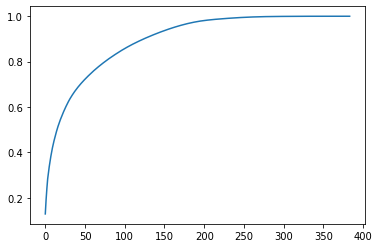

In [ ]:
pca = PCA(n_components=None)
pca.fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
#TRAZENJE OPTIMALNOG BROJA KOMPONENTI ZA PCA, N_KOMP=125
labels_y = ['L', 'N', 'R', 'S', 'T']
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
for k in [1,5,10,15,20,30,35]:
    for m in ['euclidean', 'manhattan','chebyshev','hamming']:
        for l in ['uniform','distance']:
            indexes = kf.split(X_obuka, y_obuka)
            acc_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
            for train_index, test_index in indexes:
                    X_std1 = s.fit_transform(X_obuka.iloc[train_index,:])
                    X_std_test = s.transform(X_obuka.iloc[test_index,:])
                    pca = PCA(n_components=125)
                    pca.fit(X_std1)
                    X_train_r = pca.transform(X_std1)
                    X_test_r=pca.transform(X_std_test)
                    classifier = KNeighborsClassifier(n_neighbors=k, metric=m,weights=l)
                    classifier.fit(X_train_r, y_obuka.iloc[train_index])
                    y_pred = classifier.predict(X_test_r)
                    acc_tmp.append(accuracy_score(y_obuka.iloc[test_index], y_pred))
                    fin_conf_mat += confusion_matrix(y_obuka.iloc[test_index], y_pred, labels=labels_y)
            print('za parametre  n_components= 125, k=', k, ' i m=', m, 'weigth je:',l,' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
            print(fin_conf_mat)
            acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))

# za parametre  n_components= 125, k= 20  i m= euclidean weigth je: distance  tacnost je:  0.8516663131936907  a mat. konf. je:
# [[1.082e+03 5.700e+01 7.800e+01 1.020e+02 2.700e+01]
#  [2.100e+01 1.289e+03 1.400e+01 4.500e+01 4.700e+01]
#  [4.900e+01 8.300e+01 1.105e+03 1.010e+02 8.000e+00]
#  [5.900e+01 8.500e+01 4.700e+01 1.157e+03 6.700e+01]
#  [1.000e+00 6.300e+01 3.000e+00 7.200e+01 1.275e+03]]

za parametre  n_components= 125, k= 1  i m= euclidean weigth je: uniform  tacnost je:  0.7266809719259286  a mat. konf. je:
[[ 914.   92.  140.  171.   29.]
 [  57. 1108.   60.  101.   90.]
 [ 155.  122.  892.  167.   10.]
 [ 124.  139.  124.  936.   92.]
 [  10.  108.    8.   97. 1191.]]
za parametre  n_components= 125, k= 1  i m= euclidean weigth je: distance  tacnost je:  0.7249520732229666  a mat. konf. je:
[[ 915.   95.  136.  171.   29.]
 [  58. 1097.   62.  106.   93.]
 [ 150.  116.  898.  172.   10.]
 [ 126.  137.  126.  933.   93.]
 [  12.  112.    8.   96. 1186.]]
za parametre  n_components= 125, k= 1  i m= manhattan weigth je: uniform  tacnost je:  0.6900644984218471  a mat. konf. je:
[[ 872.  105.  142.  185.   42.]
 [  67. 1062.   76.  117.   94.]
 [ 167.  142.  833.  187.   17.]
 [ 141.  153.  129.  882.  110.]
 [  24.  134.    7.  111. 1138.]]
za parametre  n_components= 125, k= 1  i m= manhattan weigth je: distance  tacnost je:  0.6915070840142886  a mat. konf. je:
[[ 8

In [ ]:
#TRAZENJE OPTIMALNOG BROJA KOMPONENTI ZA PCA, N_KOMP=150
labels_y = ['L', 'N', 'R', 'S', 'T']
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
for k in [1,5,10,15,20,30,35]:
    for m in ['euclidean', 'manhattan','chebyshev','hamming']:
        for l in ['uniform','distance']:
            indexes = kf.split(X_obuka, y_obuka)
            acc_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
            for train_index, test_index in indexes:
                    X_std1 = s.fit_transform(X_obuka.iloc[train_index,:])
                    X_std_test = s.transform(X_obuka.iloc[test_index,:])
                    pca = PCA(n_components=150)
                    pca.fit(X_std1)
                    X_train_r = pca.transform(X_std1)
                    X_test_r=pca.transform(X_std_test)
                    classifier = KNeighborsClassifier(n_neighbors=k, metric=m,weights=l)
                    classifier.fit(X_train_r, y_obuka.iloc[train_index])
                    y_pred = classifier.predict(X_test_r)
                    acc_tmp.append(accuracy_score(y_obuka.iloc[test_index], y_pred))
                    fin_conf_mat += confusion_matrix(y_obuka.iloc[test_index], y_pred, labels=labels_y)
            print('za parametre  n_components= 150, k=', k, ' i m=', m, 'weigth je:',l,' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
            print(fin_conf_mat)
            acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))


# za parametre  n_components= 150, k= 30  i m= euclidean weigth je: distance  tacnost je:  0.8470518274552855  a mat. konf. je:
# [[1081.   55.   86.  103.   21.]
#  [  24. 1278.   18.   53.   43.]
#  [  49.   91. 1098.  100.    8.]
#  [  65.   87.   37. 1164.   62.]
#  [   3.   75.    2.   79. 1255.]]

za parametre  n_components= 150, k= 1  i m= euclidean weigth je: uniform  tacnost je:  0.7196152550619409  a mat. konf. je:
[[ 907.   96.  136.  182.   25.]
 [  64. 1093.   64.  108.   87.]
 [ 148.  118.  890.  182.    8.]
 [ 126.  141.  119.  930.   99.]
 [  11.  117.    9.  105. 1172.]]
za parametre  n_components= 150, k= 1  i m= euclidean weigth je: distance  tacnost je:  0.721635041231583  a mat. konf. je:
[[ 910.   94.  135.  179.   28.]
 [  58. 1101.   69.  106.   82.]
 [ 157.  118.  894.  169.    8.]
 [ 127.  139.  121.  930.   98.]
 [   8.  117.   10.  108. 1171.]]
za parametre  n_components= 150, k= 1  i m= manhattan weigth je: uniform  tacnost je:  0.6811278698886768  a mat. konf. je:
[[ 860.  107.  135.  204.   40.]
 [  81. 1052.   75.  117.   91.]
 [ 171.  147.  809.  201.   18.]
 [ 137.  163.  127.  893.   95.]
 [  24.  152.    9.  118. 1111.]]
za parametre  n_components= 150, k= 1  i m= manhattan weigth je: distance  tacnost je:  0.6835772296867397  a mat. konf. je:
[[ 87

In [ ]:
#TRAZENJE OPTIMALNOG BROJA KOMPONENTI ZA PCA, N_KOMP=175
labels_y = ['L', 'N', 'R', 'S', 'T']
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
for k in [1,5,10,15,20,30,35]:
    for m in ['euclidean', 'manhattan','chebyshev','hamming']:
        for l in ['uniform','distance']:
            indexes = kf.split(X_obuka, y_obuka)
            acc_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
            for train_index, test_index in indexes:
                    X_std1 = s.fit_transform(X_obuka.iloc[train_index,:])
                    X_std_test = s.transform(X_obuka.iloc[test_index,:])
                    pca = PCA(n_components=175)
                    pca.fit(X_std1)
                    X_train_r = pca.transform(X_std1)
                    X_test_r=pca.transform(X_std_test)
                    classifier = KNeighborsClassifier(n_neighbors=k, metric=m,weights=l)
                    classifier.fit(X_train_r, y_obuka.iloc[train_index])
                    y_pred = classifier.predict(X_test_r)
                    acc_tmp.append(accuracy_score(y_obuka.iloc[test_index], y_pred))
                    fin_conf_mat += confusion_matrix(y_obuka.iloc[test_index], y_pred, labels=labels_y)
            print('za parametre  n_components= 175, k=', k, ' i m=', m, 'weigth je:',l,' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
            print(fin_conf_mat)
            acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))


# za parametre  n_components= 175, k= 20  i m= euclidean weigth je: distance  tacnost je:  0.8480600571378669  a mat. konf. je:
# [[1082.   55.   85.   98.   26.]
#  [  20. 1299.   17.   42.   38.]
#  [  56.   92. 1076.  113.    9.]
#  [  63.   86.   41. 1159.   66.]
#  [   0.   67.    3.   77. 1267.]]

za parametre  n_components= 175, k= 1  i m= euclidean weigth je: uniform  tacnost je:  0.7155821284063358  a mat. konf. je:
[[ 903.   98.  138.  178.   29.]
 [  57. 1083.   76.  111.   89.]
 [ 157.  128.  883.  169.    9.]
 [ 116.  145.  119.  930.  105.]
 [  13.  116.    9.  111. 1165.]]
za parametre  n_components= 175, k= 1  i m= euclidean weigth je: distance  tacnost je:  0.7167346582332172  a mat. konf. je:
[[ 903.   95.  139.  178.   31.]
 [  58. 1087.   75.  109.   87.]
 [ 153.  130.  884.  170.    9.]
 [ 115.  144.  120.  933.  103.]
 [  12.  117.    9.  111. 1165.]]
za parametre  n_components= 175, k= 1  i m= manhattan weigth je: uniform  tacnost je:  0.6749292014421697  a mat. konf. je:
[[ 857.  110.  133.  202.   44.]
 [  76. 1043.   68.  122.  107.]
 [ 177.  158.  827.  169.   15.]
 [ 155.  172.  135.  849.  104.]
 [  22.  147.   15.  124. 1106.]]
za parametre  n_components= 175, k= 1  i m= manhattan weigth je: distance  tacnost je:  0.6781017253639733  a mat. konf. je:
[[ 8

In [ ]:
#TRAZENJE OPTIMALNOG BROJA KOMPONENTI ZA PCA, N_KOMP=200
labels_y = ['L', 'N', 'R', 'S', 'T']
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
for k in [1,5,10,15,20,30,35]:
    for m in ['euclidean', 'manhattan','chebyshev','hamming']:
        for l in ['uniform','distance']:
            indexes = kf.split(X_obuka, y_obuka)
            acc_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
            for train_index, test_index in indexes:
                    X_std1 = s.fit_transform(X_obuka.iloc[train_index,:])
                    X_std_test = s.transform(X_obuka.iloc[test_index,:])
                    pca = PCA(n_components=200)
                    pca.fit(X_std1)
                    X_train_r = pca.transform(X_std1)
                    X_test_r=pca.transform(X_std_test)
                    classifier = KNeighborsClassifier(n_neighbors=k, metric=m,weights=l)
                    classifier.fit(X_train_r, y_obuka.iloc[train_index])
                    y_pred = classifier.predict(X_test_r)
                    acc_tmp.append(accuracy_score(y_obuka.iloc[test_index], y_pred))
                    fin_conf_mat += confusion_matrix(y_obuka.iloc[test_index], y_pred, labels=labels_y)
            print('za parametre  n_components= 200, k=', k, ' i m=', m, 'weigth je:',l,' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
            print(fin_conf_mat)
            acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))


# za parametre  n_components= 200, k= 20  i m= euclidean weigth je: distance  tacnost je:  0.8493554316320887  a mat. konf. je:
# [[1083.   58.   83.   98.   24.]
#  [  23. 1291.   18.   45.   39.]
#  [  53.   92. 1083.  108.   10.]
#  [  66.   82.   41. 1166.   60.]
#  [   0.   64.    3.   78. 1269.]]

za parametre  n_components= 200, k= 1  i m= euclidean weigth je: uniform  tacnost je:  0.7168789583775175  a mat. konf. je:
[[ 901.  100.  136.  180.   29.]
 [  58. 1097.   72.  108.   81.]
 [ 155.  129.  879.  173.   10.]
 [ 120.  147.  118.  925.  105.]
 [  12.  113.    9.  109. 1171.]]
za parametre  n_components= 200, k= 1  i m= euclidean weigth je: distance  tacnost je:  0.7167352820090571  a mat. konf. je:
[[ 901.  101.  136.  179.   29.]
 [  58. 1097.   73.  110.   78.]
 [ 156.  130.  878.  172.   10.]
 [ 117.  149.  120.  924.  105.]
 [  12.  112.    9.  109. 1172.]]
za parametre  n_components= 200, k= 1  i m= manhattan weigth je: uniform  tacnost je:  0.6766595556220916  a mat. konf. je:
[[ 849.  107.  132.  211.   47.]
 [  73. 1043.   75.  124.  101.]
 [ 165.  166.  835.  166.   14.]
 [ 151.  177.  122.  855.  110.]
 [  20.  150.   13.  119. 1112.]]
za parametre  n_components= 200, k= 1  i m= manhattan weigth je: distance  tacnost je:  0.6759386786764308  a mat. konf. je:
[[ 8

In [ ]:
baze = [g0001,g0002,g0003,g0005,g1003,g1004,g1005,g1007,g1008,g1009,g1011,g1012,g1014,g1015,g1016,g1023,g1027,g1036,g1045,g1051,g1053,g1057,g1060]
labels_y = ['L', 'N', 'R', 'S', 'T']
acc = []
pca_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
for i in range(0,len(baze)):
  izbaci = baze[i].index
  obuka = bez_imena.drop(izbaci, axis = 0)
  test = baze[i]

  acc_tmp = []
  X_obuka29= obuka.iloc[:, :-1]
  y_obuka29 = obuka.iloc[:, -1]
  s = StandardScaler()
  XPCA_obuka29_std = s.fit_transform(X_obuka29)

  X_test1= test.iloc[:, :-1]
  y_test1 = test.iloc[:, -1]
  XPCA_test1_std = s.transform(X_test1)

  pca = PCA(n_components=125)
  pca.fit(XPCA_obuka29_std)
  X_train_PCA = pca.transform(XPCA_obuka29_std)
  X_test_PCA=pca.transform(XPCA_test1_std)

  classifier_kon = KNeighborsClassifier(n_neighbors=20, metric='euclidean',weights='distance')
  classifier_kon.fit(X_train_PCA, y_obuka29)

  # testiranje
  y_pred_kon = classifier_kon.predict(X_test_PCA) 
  conf_mat_knn1 = confusion_matrix(y_test1, y_pred_kon, labels=labels_y)
  #print(conf_mat_knnSZ)
  
  #acc_tmp.append(accuracy_score(y_test1, y_pred_kon))
  pca_conf_mat += confusion_matrix(y_test1, y_pred_kon, labels=labels_y)
  
  print(pca_conf_mat)

# [[549. 176. 239. 297.  85.]
#  [312. 366. 136. 287. 315.]
#  [289. 181. 517. 288.  71.]
#  [208. 230. 258. 466. 253.]
#  [ 55. 249.  43. 133. 934.]]

[[45.  4.  7.  1.  0.]
 [35.  9. 14.  2.  0.]
 [10.  9. 38.  0.  0.]
 [23.  2.  5. 30.  0.]
 [30.  5. 13.  9.  3.]]
[[87. 12. 10.  4.  1.]
 [77. 22. 17.  2.  2.]
 [43. 17. 51.  3.  0.]
 [40. 34.  6. 38.  2.]
 [39. 32. 13. 14. 22.]]
[[92. 22. 42. 14.  1.]
 [78. 38. 38. 23.  3.]
 [45. 59. 60.  6.  1.]
 [40. 51. 42. 41.  6.]
 [39. 39. 14. 16. 72.]]
[[ 98.  43.  47.  39.   1.]
 [ 82.  55.  39.  59.   5.]
 [ 61.  60.  80.  26.   1.]
 [ 49.  51.  42.  92.   6.]
 [ 39.  40.  14.  17. 130.]]
[[142.  44.  52.  42.   5.]
 [ 86.  81.  41.  62.  30.]
 [ 77.  63.  96.  32.  17.]
 [ 55.  67.  44. 104.  30.]
 [ 39.  40.  14.  17. 190.]]
[[156.  59.  59.  52.  18.]
 [ 86.  96.  47.  68.  65.]
 [ 82.  86. 108.  41.  27.]
 [ 55.  85.  47. 106.  69.]
 [ 39.  52.  15.  18. 238.]]
[[164.  69.  62.  90.  18.]
 [ 87. 121.  60.  81.  75.]
 [ 90.  86. 115.  85.  27.]
 [ 57.  87.  95. 111.  74.]
 [ 40.  78.  21.  22. 263.]]
[[202.  71.  67. 103.  19.]
 [100. 137.  62. 107.  80.]
 [ 97.  86. 163.  89.  27.]
 [ 7

In [ ]:
L = evaluation_classif_L(pca_conf_mat)
N = evaluation_classif_N(pca_conf_mat)
R = evaluation_classif_R(pca_conf_mat)
S = evaluation_classif_S(pca_conf_mat)
T = evaluation_classif_T(pca_conf_mat)

prosecna_tacnost = (L[0]+N[0]+R[0]+S[0]+T[0])/5
print('PROSECNA TACNOST PCA JE ', prosecna_tacnost)

prosecna_specificnost = (L[3]+N[3]+R[3]+S[3]+T[3])/5
print('PROSECNA specificnost PCA JE ', prosecna_specificnost)

prosecna_preciznost = (L[1]+N[1]+R[1]+S[1]+T[1])/5
print('PROSECNA preciznost PCA JE ', prosecna_preciznost)

prosecna_osetljivost = (L[2]+N[2]+R[2]+S[2]+T[2])/5
print('PROSECNA osetljivost PCA JE ', prosecna_osetljivost)

# PROSECNA TACNOST PCA JE  0.7632982557301426
# PROSECNA specificnost PCA JE  0.8520096056123918
# PROSECNA preciznost PCA JE  0.40130188585725823
# PROSECNA osetljivost PCA JE  0.4080633812706715

PROSECNA TACNOST PCA JE  0.7632982557301426
PROSECNA specificnost PCA JE  0.8520096056123918
PROSECNA preciznost PCA JE  0.40130188585725823
PROSECNA osetljivost PCA JE  0.4080633812706715


In [ ]:
#ODABIR OPTIMALNIH PARAMETARA ZA KNN, LDA N_KOMP=4
labels_y = ['L', 'N', 'R', 'S', 'T']
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
for k in [1,5,10,15,20,30,35]:
    for m in ['euclidean', 'manhattan','chebyshev']:
        for l in ['uniform','distance']:
            indexes = kf.split(X_obuka, y_obuka)
            acc_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
            for train_index, test_index in indexes:
                    X_std1 = s.fit_transform(X_obuka.iloc[train_index,:])
                    X_std_test = s.transform(X_obuka.iloc[test_index,:])
                    lda = LinearDiscriminantAnalysis(n_components=4)
                    lda.fit(X_std1,y_obuka.iloc[train_index])
                    X_train_r = lda.transform(X_std1)
                    X_test_r=lda.transform(X_std_test)
                    classifier = KNeighborsClassifier(n_neighbors=k, metric=m,weights=l)
                    classifier.fit(X_train_r, y_obuka.iloc[train_index])
                    y_pred = classifier.predict(X_test_r)
                    acc_tmp.append(accuracy_score(y_obuka.iloc[test_index], y_pred))
                    fin_conf_mat += confusion_matrix(y_obuka.iloc[test_index], y_pred, labels=labels_y)
            print('za parametre  n_components= 4, k=', k, ' i m=', m, 'weigth je:',l,' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
            print(fin_conf_mat)
            acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))

# za parametre  n_components= 4, k= 35  i m= euclidean weigth je: distance  tacnost je:  0.7252446240918864  a mat. konf. je:
# [[ 921.  112.  152.  134.   27.]
#  [  92. 1024.   88.  109.  103.]
#  [ 137.   90.  953.  149.   17.]
#  [ 106.  142.  106.  940.  121.]
#  [  19.  105.    7.   90. 1193.]]

za parametre  n_components= 4, k= 1  i m= euclidean weigth je: uniform  tacnost je:  0.6410581733348304  a mat. konf. je:
[[ 839.  124.  202.  151.   30.]
 [ 143.  873.   99.  154.  147.]
 [ 196.  102.  865.  162.   21.]
 [ 166.  160.  169.  786.  134.]
 [  33.  133.   18.  146. 1084.]]
za parametre  n_components= 4, k= 1  i m= euclidean weigth je: distance  tacnost je:  0.6410581733348304  a mat. konf. je:
[[ 839.  124.  202.  151.   30.]
 [ 143.  873.   99.  154.  147.]
 [ 196.  102.  865.  162.   21.]
 [ 166.  160.  169.  786.  134.]
 [  33.  133.   18.  146. 1084.]]
za parametre  n_components= 4, k= 1  i m= manhattan weigth je: uniform  tacnost je:  0.6400497357269692  a mat. konf. je:
[[ 825.  126.  205.  160.   30.]
 [ 133.  871.  106.  156.  150.]
 [ 193.  101.  869.  164.   19.]
 [ 164.  164.  167.  781.  139.]
 [  33.  142.   17.  128. 1094.]]
za parametre  n_components= 4, k= 1  i m= manhattan weigth je: distance  tacnost je:  0.6400497357269692  a mat. konf. je:
[[ 825.  126

In [ ]:
#ODABIR OPTIMALNIH PARAMETARA ZA KNN, LDA N_KOMP=3
labels_y = ['L', 'N', 'R', 'S', 'T']
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
for k in [1,5,10,15,20,30,35]:
    for m in ['euclidean', 'manhattan','chebyshev']:
        for l in ['uniform','distance']:
            indexes = kf.split(X_obuka, y_obuka)
            acc_tmp = []
            fin_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
            for train_index, test_index in indexes:
                    X_std1 = s.fit_transform(X_obuka.iloc[train_index,:])
                    X_std_test = s.transform(X_obuka.iloc[test_index,:])
                    lda = LinearDiscriminantAnalysis(n_components=3)
                    lda.fit(X_std1,y_obuka.iloc[train_index])
                    X_train_r = lda.transform(X_std1)
                    X_test_r=lda.transform(X_std_test)
                    classifier = KNeighborsClassifier(n_neighbors=k, metric=m,weights=l)
                    classifier.fit(X_train_r, y_obuka.iloc[train_index])
                    y_pred = classifier.predict(X_test_r)
                    acc_tmp.append(accuracy_score(y_obuka.iloc[test_index], y_pred))
                    fin_conf_mat += confusion_matrix(y_obuka.iloc[test_index], y_pred, labels=labels_y)
            print('za parametre  n_components= 3, k=', k, ' i m=', m, 'weigth je:',l,' tacnost je: ', np.mean(acc_tmp), ' a mat. konf. je:')
            print(fin_conf_mat)
            acc.append(np.mean(acc_tmp))
print('najbolja tacnost je u iteraciji broj: ', np.argmax(acc))

# za parametre  n_components= 3, k= 35  i m= manhattan weigth je: uniform  tacnost je:  0.6967027209102137  a mat. konf. je:
# [[9.000e+02 1.270e+02 1.560e+02 1.420e+02 2.100e+01]
#  [9.500e+01 1.002e+03 9.900e+01 9.500e+01 1.250e+02]
#  [1.180e+02 1.280e+02 8.980e+02 1.900e+02 1.200e+01]
#  [1.330e+02 1.300e+02 1.500e+02 8.820e+02 1.200e+02]
#  [1.100e+01 1.410e+02 1.000e+00 1.100e+02 1.151e+03]]

za parametre  n_components= 3, k= 1  i m= euclidean weigth je: uniform  tacnost je:  0.6100621280736556  a mat. konf. je:
[[ 813.  135.  179.  196.   23.]
 [ 127.  840.  154.  119.  176.]
 [ 185.  155.  789.  200.   17.]
 [ 179.  128.  216.  745.  147.]
 [  26.  181.   16.  146. 1045.]]
za parametre  n_components= 3, k= 1  i m= euclidean weigth je: distance  tacnost je:  0.6100621280736556  a mat. konf. je:
[[ 813.  135.  179.  196.   23.]
 [ 127.  840.  154.  119.  176.]
 [ 185.  155.  789.  200.   17.]
 [ 179.  128.  216.  745.  147.]
 [  26.  181.   16.  146. 1045.]]
za parametre  n_components= 3, k= 1  i m= manhattan weigth je: uniform  tacnost je:  0.611794561506377  a mat. konf. je:
[[ 825.  142.  167.  192.   20.]
 [ 126.  839.  145.  136.  170.]
 [ 182.  153.  793.  198.   20.]
 [ 191.  133.  211.  746.  134.]
 [  30.  178.   17.  148. 1041.]]
za parametre  n_components= 3, k= 1  i m= manhattan weigth je: distance  tacnost je:  0.611794561506377  a mat. konf. je:
[[ 825.  142. 

In [ ]:
baze = [g0001,g0002,g0003,g0005,g1003,g1004,g1005,g1007,g1008,g1009,g1011,g1012,g1014,g1015,g1016,g1023,g1027,g1036,g1045,g1051,g1053,g1057,g1060]
labels_y = ['L', 'N', 'R', 'S', 'T']
acc = []
LDA_conf_mat = np.zeros((len(np.unique(y_obuka)),len(np.unique(y_obuka))))
for i in range(0,len(baze)):
  izbaci = baze[i].index
  obuka = bez_imena.drop(izbaci, axis = 0)
  test = baze[i]

  acc_tmp = []
  X_obuka29= obuka.iloc[:, :-1]
  y_obuka29 = obuka.iloc[:, -1]
  s = StandardScaler()
  XLDA_obuka29_std = s.fit_transform(X_obuka29)

  X_test1= test.iloc[:, :-1]
  y_test1 = test.iloc[:, -1]
  XLDA_test1_std = s.transform(X_test1)

  lda = LinearDiscriminantAnalysis(n_components=4)
  lda.fit(XLDA_obuka29_std, y_obuka29)
  X_train_29_lda = lda.transform(XLDA_obuka29_std)
  X_test_29_lda = lda.transform(XLDA_test1_std)

  classifier_kon = KNeighborsClassifier(n_neighbors=35, metric='euclidean',weights='distance')
  classifier_kon.fit(X_train_29_lda, y_obuka29)

  # testiranje
  y_pred_kon = classifier_kon.predict(X_test_29_lda) 
  conf_mat_knn1 = confusion_matrix(y_test1, y_pred_kon, labels=labels_y)
  #print(conf_mat_knnSZ)
  
  #acc_tmp.append(accuracy_score(y_test1, y_pred_kon))
  LDA_conf_mat += confusion_matrix(y_test1, y_pred_kon, labels=labels_y)
  
  print(LDA_conf_mat)

#   [[562. 196. 246. 248.  94.]
#  [213. 506. 192. 232. 273.]
#  [215. 211. 642. 186.  92.]
#  [215. 243. 206. 523. 228.]
#  [ 48. 194.  65. 125. 982.]]


[[11.  5. 40.  1.  0.]
 [ 0.  6. 53.  1.  0.]
 [ 0.  0. 57.  0.  0.]
 [ 0.  0. 38. 22.  0.]
 [ 1. 10. 46.  3.  0.]]
[[24. 39. 44.  2.  5.]
 [ 1. 57. 55.  5.  2.]
 [ 2. 47. 59.  4.  2.]
 [ 0. 31. 38. 39. 12.]
 [ 1. 17. 46. 12. 44.]]
[[ 33.  41.  83.   9.   5.]
 [  4. 105.  55.  14.   2.]
 [ 12.  61.  87.   9.   2.]
 [  2.  49.  64.  52.  13.]
 [  1.  25.  46.  19.  89.]]
[[ 33.  49.  85.  56.   5.]
 [  4. 111.  58.  65.   2.]
 [ 16.  61. 114.  35.   2.]
 [  5.  49.  64. 109.  13.]
 [  1.  33.  46.  20. 140.]]
[[ 90.  49.  85.  56.   5.]
 [ 26. 138.  61.  67.   8.]
 [ 57.  64. 127.  35.   2.]
 [ 25.  56.  74. 121.  24.]
 [  1.  33.  46.  20. 200.]]
[[116.  62.  97.  58.  11.]
 [ 27. 159.  65.  67.  44.]
 [ 59.  96. 144.  35.  10.]
 [ 27.  80.  75. 122.  58.]
 [  1.  38.  46.  20. 257.]]
[[158.  75.  98.  61.  11.]
 [ 31. 208.  65.  70.  50.]
 [ 90. 104. 164.  35.  10.]
 [ 47.  93.  75. 147.  62.]
 [  2.  51.  46.  20. 305.]]
[[199.  83. 105.  64.  11.]
 [ 34. 247.  65.  87.  53.]
 [101. 

In [ ]:
L = evaluation_classif_L(LDA_conf_mat)
N = evaluation_classif_N(LDA_conf_mat)
R = evaluation_classif_R(LDA_conf_mat)
S = evaluation_classif_S(LDA_conf_mat)
T = evaluation_classif_T(LDA_conf_mat)

prosecna_tacnost = (L[0]+N[0]+R[0]+S[0]+T[0])/5
print('PROSECNA TACNOST LDA JE ', prosecna_tacnost)

prosecna_specificnost = (L[3]+N[3]+R[3]+S[3]+T[3])/5
print('PROSECNA specificnost LDA JE ', prosecna_specificnost)

prosecna_preciznost = (L[1]+N[1]+R[1]+S[1]+T[1])/5
print('PROSECNA preciznost LDA JE ', prosecna_preciznost)

prosecna_osetljivost = (L[2]+N[2]+R[2]+S[2]+T[2])/5
print('PROSECNA osetljivost LDA JE ', prosecna_osetljivost)

# PROSECNA TACNOST LDA JE  0.7853827302868674
# PROSECNA specificnost LDA JE  0.8658185181421046
# PROSECNA preciznost LDA JE  0.4569878986863788
# PROSECNA osetljivost LDA JE  0.46318838062054046

PROSECNA TACNOST LDA JE  0.7853827302868674
PROSECNA specificnost LDA JE  0.8658185181421046
PROSECNA preciznost LDA JE  0.4569878986863788
PROSECNA osetljivost LDA JE  0.46318838062054046
